In [160]:
# perceptrone from scratch 
# by : Hamdane Sid-Ali - github.com/sidalihmdn/
import numpy as np
import math
import matplotlib.pyplot as plt


class Perceptron :
    
    def __init__(self,nFeatures):
        #the number of features 
        self.nFeatures = nFeatures
        # the number of weights is the number of features + a baias
        self.weights = np.random.rand(nFeatures + 1)
    
    
    # the sigmoid function returns a value between 0 and 1
    def sigmoid(self , x):
        return 1 / (1 + np.exp(-x))
    
    # the gradient descent helps aas to tune the weights
    def gradientDescent(self , data , weights, e ,  lr = 0.01 ,):
        newWeights = weights
        newWeights = newWeights - e*lr*data
        return newWeights

    # the train function
    def train(self, data , y ,  nEpochs = 1000 , lr = 0.01) :
        # setting the correct shape for the data array
        if data.shape[1] != self.nFeatures :
            data = data.T
        if data.shape[1] != self.nFeatures :
            raise TypeError('number of features is not correct!')
        
        # the number of simples is the number of lines in the data vector
        n_samples = data.shape[0]
        
        #adding a column of biais to the data, so every line will be in this form [biais feature_1 feature_2]
        data = np.concatenate((np.ones((n_samples,1)),data),axis=1)
        
        # this loop will train the model and tune the weights in every itteration
        for epoch in range(nEpochs):
            for i in range(n_samples):
                y_hat = self.sigmoid(np.dot(self.weights.T , data[i]))
                e = y_hat - y[i]
                self.weights = self.gradientDescent(data[i],self.weights,e,lr)
            
            
                
    # this function will help us test the perceptron with a single value            
    def test(self , x1 , x2):
        data_ = np.array([1, x1, x2])
        y_hat = self.sigmoid(np.dot(self.weights.T , data_ ))
        return y_hat
            
            
   
# ceating a set of data     
f = lambda x : 2*x - 10

x1 = np.random.randint(0,30,100)
x2 = np.random.randint(0,30,100)
y  = np.zeros(len(x1))

for i in range(len(x1)) :
    if (x2[i] > f(x1[i])):
        y[i] = 1
    else :
        y[i] = 0
        


data = np.array([x1 , x2])
data = data.T


In [155]:
print(y)

[1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1.]


In [161]:
# create a perceptrone object
p = Perceptron(2)
p.train(data,y)


#here we test the perceptrone with individual values
a1 = 10
a2 = 2
print(f"x1 = {a1} , x2 = {a2} , y = {p.test(a1,a2)}")


x1 = 10 , x2 = 2 , y = 2.9941282027056046e-06


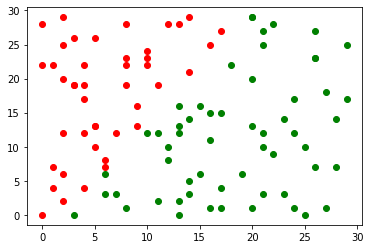

In [162]:
x1_test = np.random.randint(0,30,100)
x2_test = np.random.randint(0,30,100)

y_test = np.zeros(len(x1_test))

result1_x1 = []
result1_x2 = []
result2_x1 = []
result2_x2 = []

for i in range(len(x1_test)):
    y_ = p.test(x1_test[i] , x2_test[i])
    
    # when we test the our set of points, we separate the points into two sets 
    if (y_ > 0.9) :
        y_test[i] = 1
        result1_x1.append(x1_test[i])
        result1_x2.append(x2_test[i])
    else :
        y_test[i] = 0
        result2_x1.append(x1_test[i])
        result2_x2.append(x2_test[i])
    

# plot the points 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(result1_x1 , result1_x2 , c='r')
ax1.scatter(result2_x1 , result2_x2 , c='g')
plt.show()